In [7]:
import matplotlib.pyplot as plt
import numpy as np 
import tensorly as tl
import string
import scipy
import itertools
import torch as tn
import cProfile
import pstats
import time

# Basic tensor operations

In [2]:
from source.tensor_operations import *
"""
Testing n-mode product, Khatri-Rao, and Kronecker product
"""

'\nTesting n-mode product, Khatri-Rao, and Kronecker product\n'

In [3]:
# nmode product
def nmodecost(n, m, d, iter):
    X = np.random.randn(*([n]*d))
    mat = [np.random.randn(m, n) for i in range(d)]
    start_time = time.process_time()
    for _ in range(iter):
        Y = X.copy()
        for i in range(d):
            Y = n_mode_prod(Y, mat[i], i+1)
    
    end_time = time.process_time()
    cpu_time = (end_time - start_time)/iter
    return Y, cpu_time

In [4]:
# testmt = []
# testnt = []
# testdt = []
# n = 6
# m = 7
# d = 8

# # Test for n; m = 6, d = 8
# testn = np.arange(1, 8, 2, dtype=int)
# for i in testn:
#     _, t = nmodecost(i, m, d, iter=10)
#     testnt.append(t)

# # Test for m; n = 6, d = 8
# testm = np.arange(1, 8, 2, dtype=int)
# for i in testm:
#     _, t = nmodecost(n, i, d, iter=10)
#     testmt.append(t)

# # Test for d
# testd = np.arange(1, 8, 2, dtype=int)
# for i in testd:
#     _, t = nmodecost(n, m, i, iter=1000)
#     testdt.append(t)

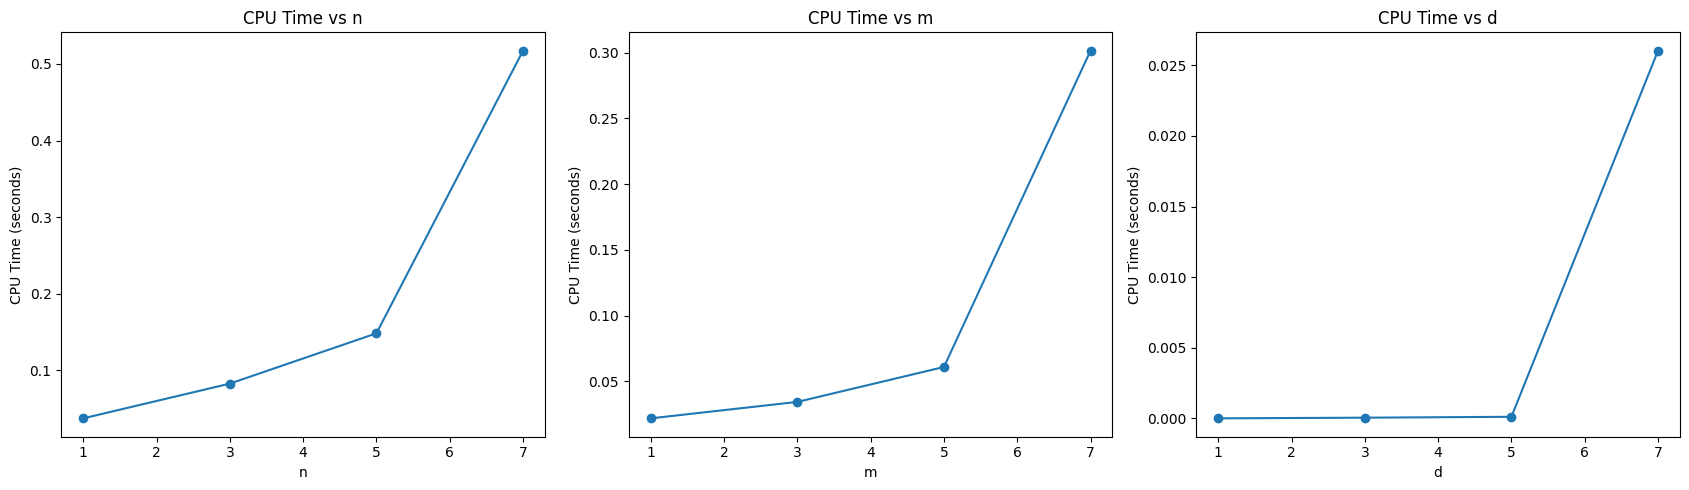

In [42]:
# Plotting the results
fig, axs = plt.subplots(1, 3, figsize=(17, 5))

# Plot for testn
axs[0].plot(testn, testnt, marker='o', linestyle='-')
axs[0].set_title('CPU Time vs n')
axs[0].set_xlabel('n')
axs[0].set_ylabel('CPU Time (seconds)')

# Plot for testm
axs[1].plot(testm, testmt, marker='o', linestyle='-')
axs[1].set_title('CPU Time vs m')
axs[1].set_xlabel('m')
axs[1].set_ylabel('CPU Time (seconds)')

# Plot for testd
axs[2].plot(testd, testdt, marker='o', linestyle='-')
axs[2].set_title('CPU Time vs d')
axs[2].set_xlabel('d')
axs[2].set_ylabel('CPU Time (seconds)')

plt.tight_layout()
plt.show()

In [5]:
# Khatri-Rao cost
def khatrirao_cost(n, m):
    X = np.random.randn(n, m)
    Y = np.random.randn(n, m)
    start_time = time.process_time()
    res = khatri_rao_prod(X, Y)
    end_time = time.process_time()
    cpu_time = end_time - start_time
    return res, cpu_time

In [8]:
n = 100
m = 100
testkrn = []
testkrm = []

testkrn_t = np.arange(1000, 2001, 200, dtype=int)
for i in testkrn_t:
    testkrn.append(khatrirao_cost(i, m)[1])

# testkrm_t = np.arange(1000, 5001, 1000, dtype=int)
# for i in testkrm_t:
#     testkrm.append(khatrirao_cost(n, i)[1])    

NameError: name 'khatrirao_cost' is not defined

In [ ]:
# Kronecker cost
def kronecker_cost(n, m, iter):
    X = np.random.randn(n, m)
    Y = np.random.randn(n, m)
    start_time = time.process_time()
    for _ in range(iter): res = kronecker_prod(X, Y)
    end_time = time.process_time()
    cpu_time = (end_time - start_time)/iter
    return res, cpu_time

In [57]:
n = 20
m = 20
testkron = []
testkrom = []

testkron_t = np.arange(100, 501, 100, dtype=int)
for i in testkron_t:
    testkron.append(kronecker_cost(i, m, iter=10)[1])

testkrom_t = np.arange(100, 501, 100, dtype=int)
for i in testkrom_t:
    testkrom.append(kronecker_cost(n, i, iter=10)[1])    

Text(0, 0.5, 'CPU Time (seconds)')

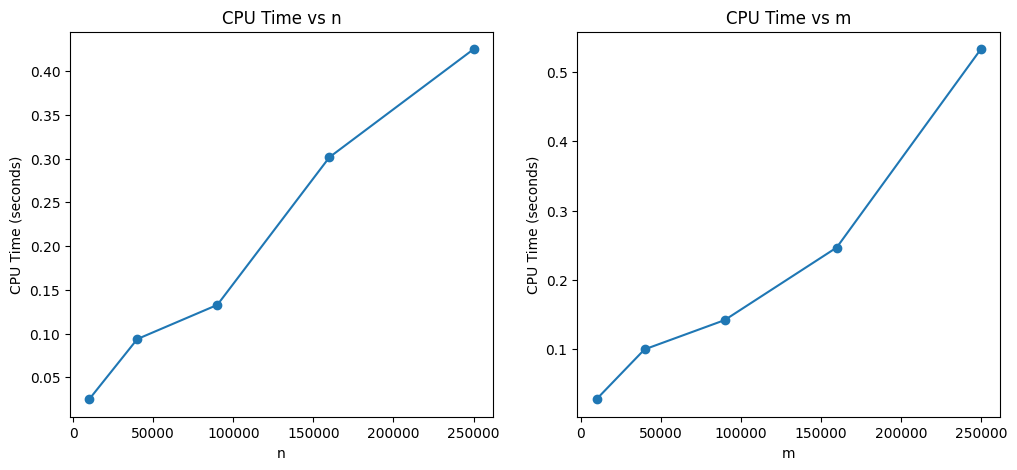

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot((testkron_t**2), testkron, marker='o')
axs[0].set_title('CPU Time vs n')
axs[0].set_xlabel('n')
axs[0].set_ylabel('CPU Time (seconds)')

axs[1].plot((testkrom_t**2), testkrom, marker='o')
axs[1].set_title('CPU Time vs m')
axs[1].set_xlabel('m')
axs[1].set_ylabel('CPU Time (seconds)')


# TT operations

In [1]:
from source.decompositions.tt import *
from source.decompositions.tt_operations import *

In [2]:
def rounding_cost(d, n, r, iter):
    Xlist = [np.random.randn(1, n, 1) for _ in range(d)]
    res = Xlist
    for _ in range(1, r):
        res = tt_add(res, Xlist)

    # print([s.shape for s in res])
    start_time = time.process_time()
    for _ in range(iter): res = tt_rounding(Xlist, rank=[1] + (d-2)*[1000] + [1])
    end_time = time.process_time()
    final_time = (end_time - start_time)/iter

    # check = np.linalg.norm(ttrec(Xlist) - ttrec(res))
    # assert check <= 1e-10, "Rounding unsuccessful"
    return final_time

In [3]:
round_d_time = []
round_n_time = []
round_r_time = []

# # for d
# round_d = np.array([200])
# for i in round_d:
#     round_d_time.append(rounding_cost(i, 5, 5, 200))

# # for n
# round_n = np.array([15000])
# for i in round_n:
#     round_n_time.append(rounding_cost(6, i, 5, 3000))

# # for r
# round_r = np.array([1250])
# for i in round_r:
#     round_r_time.append(rounding_cost(3, 3, i, 1000))

round_d = np.array([200, 300, 400, 600])
round_d_time = np.array([3.6, 5.6, 7.6, 11.8])

round_n = np.array([5000, 8000, 15000])
round_n_time = np.array([2.1, 2.8, 4.4])

round_r = np.array([500, 750, 1000, 1250])
round_r_time = np.array([1.5, 4.3, 10, 18.9])

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(17, 5))

axs[0].plot(round_d, round_d_time, marker='o')
axs[0].set_xlabel("Dimensions (d)")
axs[0].set_ylabel("CPU time (sec)")
axs[0].set_title(f"n = 5, m = 5, iterations = 200")

axs[1].plot(round_n, round_n_time, marker='o')
axs[1].set_xlabel("Number of elements (n)")
axs[1].set_ylabel("CPU time (sec)")
axs[1].set_title(f"d = 6, m = 5, iterations = 3000")

axs[2].plot(round_r**3, round_r_time, marker='o')
axs[2].set_xlabel(r"$r^3$")
axs[2].set_ylabel("CPU time (sec)")
axs[2].set_title(f"d = 3, n = 3, iterations = 1000")


NameError: name 'plt' is not defined

In [5]:
def ttdot_cost(d, n, r, iter):
    sh = [n for _ in range(d)]
    rk = [1] + [r for _ in range(d-1)] + [1]
    A = rand_tt(sh, rk)
    B = rand_tt(sh, rk)
    st = time.process_time()
    for _ in range(iter): res = tt_dot(A, B)
    et = time.process_time()

    return et - st

In [13]:
%timeit ttdot_cost(10, 12, 3, 1)

142 µs ± 8.75 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [65]:
ttdot_d_time = []
ttdot_n_time = []
ttdot_r_time = []

# from source.decompositions.tt_operations import rand_tt
# # for d
# ttdot_d = np.array([5000])
# for i in ttdot_d:
#     ttdot_cost(i, 5, 5, 500)

# # for n
# ttdot_n = np.array([15000])
# for i in ttdot_n:
#     ttdot_cost(6, i, 5, 3000)

# # for r
# ttdot_r = np.array([200])
# for i in ttdot_r:
#     ttdot_cost(3, 3, i, 1000)

ttdot_d = np.array([500, 1000, 2000, 5000])
ttdot_d_time = np.array([1.8, 3.7, 7, 17.6])

ttdot_n = np.array([1500, 5000, 15000])
ttdot_n_time = np.array([1.4, 8, 34.2])

ttdot_r = np.array([100, 200, 300, 400, 500])
ttdot_r_time = np.array([0.5, 1.9, 5.4, 13.5, 30.4])

Text(0.5, 1.0, 'd = 3, n = 3, iterations = 1000')

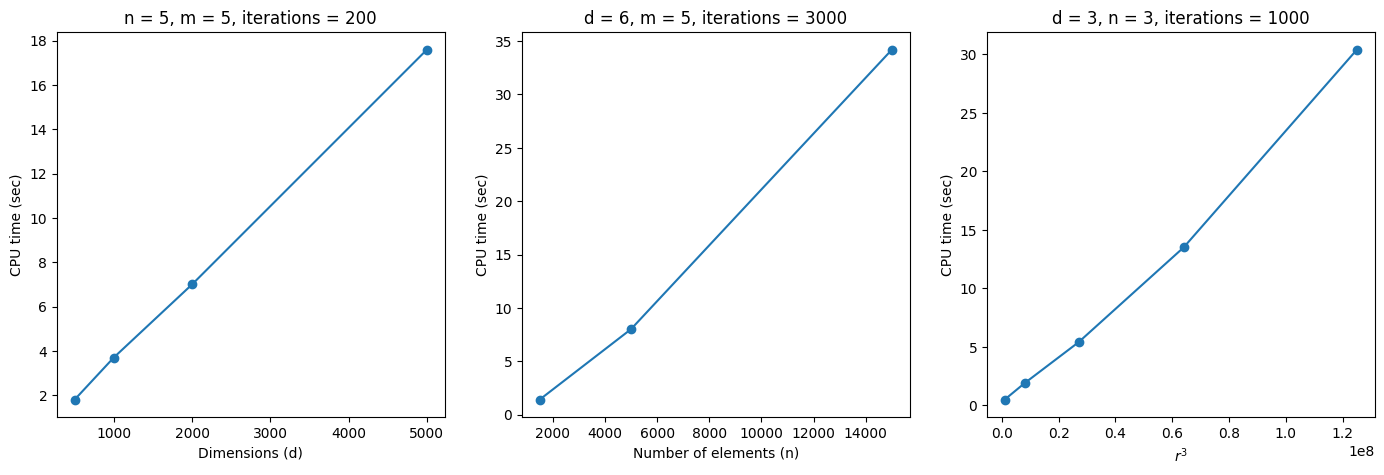

In [66]:
fig, axs = plt.subplots(1, 3, figsize=(17, 5))

axs[0].plot(ttdot_d, ttdot_d_time, marker='o')
axs[0].set_xlabel("Dimensions (d)")
axs[0].set_ylabel("CPU time (sec)")
axs[0].set_title(f"n = 5, m = 5, iterations = 200")

axs[1].plot(ttdot_n, ttdot_n_time, marker='o')
axs[1].set_xlabel("Number of elements (n)")
axs[1].set_ylabel("CPU time (sec)")
axs[1].set_title(f"d = 6, m = 5, iterations = 3000")

axs[2].plot(ttdot_r**3, ttdot_r_time, marker='o')
axs[2].set_xlabel(r"$r^3$")
axs[2].set_ylabel("CPU time (sec)")
axs[2].set_title(f"d = 3, n = 3, iterations = 1000")